CAT AND DOG CLASSIFICATION USING SVM - AMRUTH SAI MUDIVARTHI

In [1]:
import os
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skimage import io, color, feature, transform
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot

In [2]:
cats_folder = "C:/Users/M Amruth Sai/Downloads/Python Practice/PetImages/Cat"
dogs_folder = "C:/Users/M Amruth Sai/Downloads/Python Practice/PetImages/Dog"

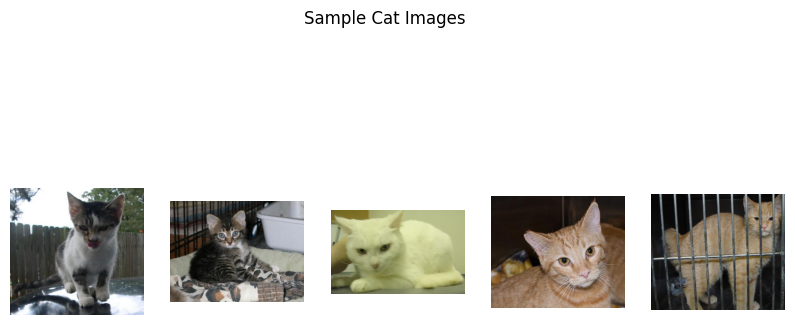

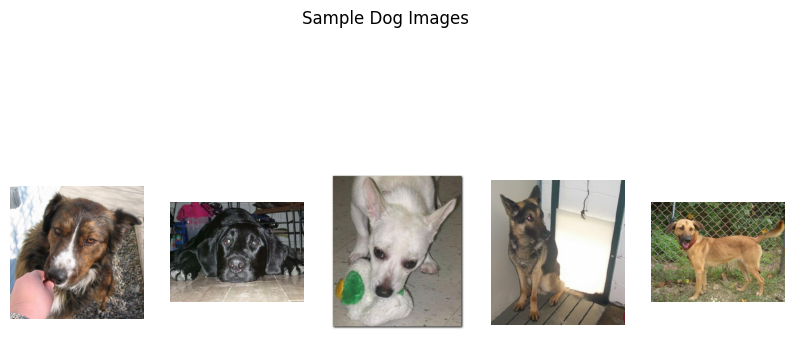

In [3]:
# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = io.imread(img_path)
        images.append(img)
    return images

# Load cat and dog images
cat_images = load_images_from_folder(cats_folder)
dog_images = load_images_from_folder(dogs_folder)

# Display sample images from each class
def display_sample_images(images, title):
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

display_sample_images(cat_images, 'Sample Cat Images')
display_sample_images(dog_images, 'Sample Dog Images')

In [4]:
cat_images = []
for filename in os.listdir(cats_folder):
    img_path = os.path.join(cats_folder, filename)
    cat_images.append(io.imread(img_path))

In [5]:
cat_images

[array([[[226, 218, 233],
         [244, 236, 249],
         [238, 232, 242],
         ...,
         [ 60,  77,  61],
         [ 57,  74,  58],
         [ 49,  66,  50]],
 
        [[226, 222, 236],
         [250, 247, 255],
         [241, 240, 248],
         ...,
         [ 59,  76,  60],
         [ 57,  74,  58],
         [ 51,  68,  52]],
 
        [[215, 217, 229],
         [240, 242, 254],
         [227, 232, 238],
         ...,
         [ 61,  75,  58],
         [ 59,  73,  56],
         [ 53,  67,  50]],
 
        ...,
 
        [[ 62,  74,  86],
         [ 85,  95, 107],
         [123, 133, 145],
         ...,
         [204, 215, 243],
         [204, 216, 242],
         [203, 215, 241]],
 
        [[ 73,  84, 106],
         [ 84,  95, 117],
         [116, 124, 143],
         ...,
         [201, 212, 240],
         [205, 215, 242],
         [204, 214, 241]],
 
        [[ 72,  83, 105],
         [ 83,  94, 116],
         [115, 123, 142],
         ...,
         [201, 212, 240],
  

In [6]:
dog_images = []
for filename in os.listdir(dogs_folder):
    img_path = os.path.join(dogs_folder, filename)
    dog_images.append(io.imread(img_path))

In [7]:
dog_images

[array([[[254, 255, 253],
         [254, 255, 253],
         [253, 255, 252],
         ...,
         [213, 208, 202],
         [211, 206, 200],
         [210, 205, 199]],
 
        [[251, 253, 250],
         [251, 253, 250],
         [251, 253, 250],
         ...,
         [217, 212, 206],
         [216, 211, 205],
         [215, 210, 204]],
 
        [[248, 250, 249],
         [248, 250, 249],
         [249, 251, 250],
         ...,
         [215, 210, 204],
         [215, 210, 204],
         [215, 210, 204]],
 
        ...,
 
        [[210, 201, 202],
         [225, 219, 219],
         [210, 206, 207],
         ...,
         [ 77,  79,  76],
         [ 70,  72,  69],
         [ 60,  62,  59]],
 
        [[211, 202, 205],
         [219, 213, 217],
         [208, 203, 209],
         ...,
         [ 78,  80,  77],
         [ 71,  73,  70],
         [ 62,  64,  61]],
 
        [[210, 201, 204],
         [212, 206, 210],
         [205, 203, 208],
         ...,
         [ 79,  81,  78],
  

In [8]:
import numpy as np
from skimage.transform import resize

cat_images_resized = [resize(img, (100, 100)) for img in cat_images]
dog_images_resized = [resize(img, (100, 100)) for img in dog_images]

In [9]:
X = np.array(cat_images_resized + dog_images_resized)
y = np.array(['cat'] * len(cat_images_resized) + ['dog'] * len(dog_images_resized))

In [10]:

import numpy as np
from skimage import color, transform

X_gray = [color.rgb2gray(img) for img in X]
X_resized = [transform.resize(img, (100, 100)) for img in X_gray]

In [11]:
X_features = np.array([feature.hog(img) for img in X_resized])

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)
svm_model = svm.SVC(kernel='linear')  
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [13]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6923076923076923


In [14]:
# Select one test image
test_image = X_features[0].reshape(1, -1) 
predicted_label = svm_model.predict(test_image)


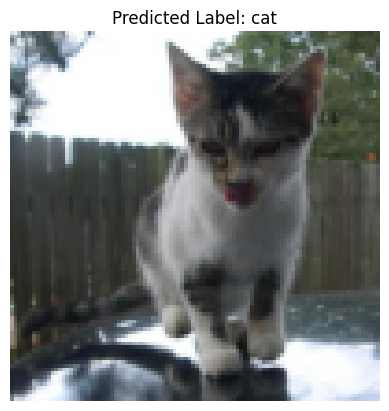

In [15]:
# Display the test image with its predicted label
plt.imshow(X[0])
plt.title(f'Predicted Label: {predicted_label[0]}')
plt.axis('off')
plt.show()